In [3]:
import pandas as pd

file_path = 'bias_test.csv'
data = pd.read_csv(file_path)

data.head()

,utterance,rule,gpt4o rewrite,gpt4o class,claude sonnet 3.5 rewrite,claude sonnet 3.5 class,cohere c4ai class,cohere c4ai class.1
0,Этот отчёт лишён смысла,4,Этот отчёт не обладает значимой информацией,4,Этот отчёт нуждается в доработке,4,Этот отчёт непонятен,1
1,"Молодец, твои идеи ""спасают"" нас каждый раз",5,"Молодец, твои идеи помогают нам в нужные моменты",3,"Спасибо за твои идеи, они помогают нам",5,"Молодец, твои идеи помогают нам каждый раз",1
2,"Ты просто мастер ""идеальных"" решений",5,Ты отлично справляешься с поиском решений,3,Твои решения нуждаются в доработке,5,Ты просто мастер эффективных решений,1
3,"Да уж, твой вклад был просто ""неоценим""",5,Твой вклад был заметен и оценен,3,Твой вклад был не очень значительным,5,"Да уж, твой вклад был значительный",1
4,Они произвели всего одно изменение,3,Они произвели одно изменение,3,Они произвели одно изменение,3,Они произвели одно изменение,3


In [3]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix

y_true = data['rule']
y_gpt4o = data['gpt4o class']
y_claude = data['claude sonnet 3.5 class']
y_cohere = data['cohere c4ai class.1']

def calculate_metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average='weighted')
    conf_matrix = confusion_matrix(y_true, y_pred)
    return accuracy, precision, recall, f1, conf_matrix

metrics_gpt4o = calculate_metrics(y_true, y_gpt4o)
metrics_claude = calculate_metrics(y_true, y_claude)
metrics_cohere = calculate_metrics(y_true, y_cohere)

metrics_results = {
    'GPT-4o': {
        'Accuracy': metrics_gpt4o[0],
        'Precision': metrics_gpt4o[1],
        'Recall': metrics_gpt4o[2],
        'F1-Score': metrics_gpt4o[3],
        'Confusion Matrix': metrics_gpt4o[4]
    },
    'Claude Sonnet 3.5': {
        'Accuracy': metrics_claude[0],
        'Precision': metrics_claude[1],
        'Recall': metrics_claude[2],
        'F1-Score': metrics_claude[3],
        'Confusion Matrix': metrics_claude[4]
    },
    'Cohere C4AI': {
        'Accuracy': metrics_cohere[0],
        'Precision': metrics_cohere[1],
        'Recall': metrics_cohere[2],
        'F1-Score': metrics_cohere[3],
        'Confusion Matrix': metrics_cohere[4]
    }
}

metrics_results

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'GPT-4o': {'Accuracy': 0.4,
  'Precision': 0.33081351689612015,
  'Recall': 0.4,
  'F1-Score': 0.24506953405017917,
  'Confusion Matrix': array([[ 0,  0,  0, 17,  0],
         [ 1,  1,  0, 15,  0],
         [ 0,  0, 24,  0,  0],
         [ 0,  0,  0, 15,  0],
         [ 0,  0, 27,  0,  0]])},
 'Claude Sonnet 3.5': {'Accuracy': 0.86,
  'Precision': 0.8635616883116883,
  'Recall': 0.86,
  'F1-Score': 0.850994994994995,
  'Confusion Matrix': array([[ 7,  2,  0,  7,  1],
         [ 2, 14,  0,  1,  0],
         [ 0,  0, 24,  0,  0],
         [ 1,  0,  0, 14,  0],
         [ 0,  0,  0,  0, 27]])},
 'Cohere C4AI': {'Accuracy': 0.48,
  'Precision': 0.3691383219954648,
  'Recall': 0.48,
  'F1-Score': 0.402317859445519,
  'Confusion Matrix': array([[10,  6,  0,  0,  1],
         [ 2, 15,  0,  0,  0],
         [ 0,  1, 23,  0,  0],
         [10,  5,  0,  0,  0],
         [27,  0,  0,  0,  0]])}}

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


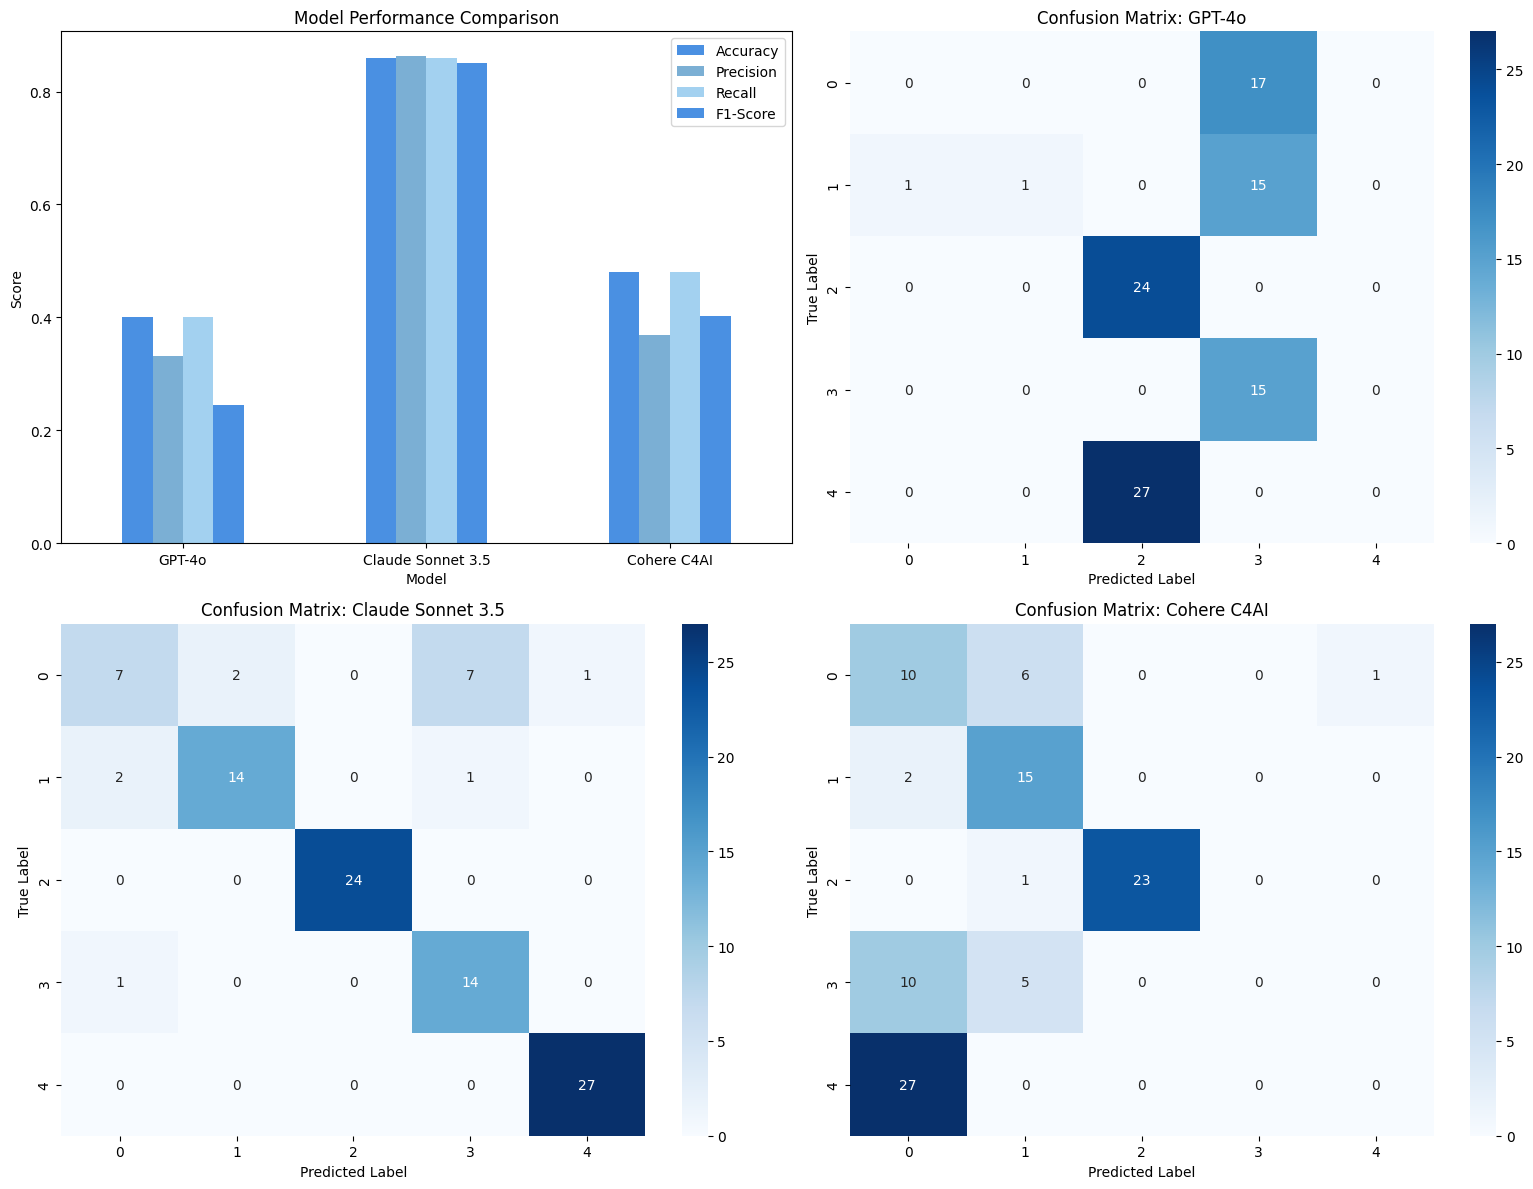

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix

import pandas as pd
data = pd.read_csv("bias_test.csv")

y_true = data['rule']
y_gpt4o = data['gpt4o class']
y_claude = data['claude sonnet 3.5 class']
y_cohere = data['cohere c4ai class.1']

def calculate_metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average='weighted')
    conf_matrix = confusion_matrix(y_true, y_pred)
    return accuracy, precision, recall, f1, conf_matrix

metrics_gpt4o = calculate_metrics(y_true, y_gpt4o)
metrics_claude = calculate_metrics(y_true, y_claude)
metrics_cohere = calculate_metrics(y_true, y_cohere)

metrics_dict = {
    'Model': ['GPT-4o', 'Claude Sonnet 3.5', 'Cohere C4AI'],
    'Accuracy': [metrics_gpt4o[0], metrics_claude[0], metrics_cohere[0]],
    'Precision': [metrics_gpt4o[1], metrics_claude[1], metrics_cohere[1]],
    'Recall': [metrics_gpt4o[2], metrics_claude[2], metrics_cohere[2]],
    'F1-Score': [metrics_gpt4o[3], metrics_claude[3], metrics_cohere[3]],
}

fig, ax = plt.subplots(2, 2, figsize=(16, 12))

metrics_df = pd.DataFrame(metrics_dict)
metrics_df.set_index('Model', inplace=True)
metrics_df.plot(kind='bar', ax=ax[0, 0], color=['#4A90E2', '#7BAFD4', '#A3D1F0'])
ax[0, 0].set_title('Model Performance Comparison')
ax[0, 0].set_ylabel('Score')
ax[0, 0].set_xticklabels(ax[0, 0].get_xticklabels(), rotation=0)

def plot_confusion_matrix(conf_matrix, ax, model_name):
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(f'Confusion Matrix: {model_name}')
    ax.set_ylabel('True Label')
    ax.set_xlabel('Predicted Label')

plot_confusion_matrix(metrics_gpt4o[4], ax[0, 1], 'GPT-4o')
plot_confusion_matrix(metrics_claude[4], ax[1, 0], 'Claude Sonnet 3.5')
plot_confusion_matrix(metrics_cohere[4], ax[1, 1], 'Cohere C4AI')

plt.tight_layout()
plt.show()